# Webscraping

#### Seoyoung Cho

### 1. Legal and Ethical Issues


The website that I will be scraping all the recipes from is "Simply Recipes": https://www.simplyrecipes.com/


The website mentions on their terms of use that: "you agree not to: “Scrape” or disaggregate data from the Site (whether by manual or automated means) for any commercial, marketing, or data compiling or enhancing purpose." but they also mentioned: "Simply Recipes grants you a personal, non-exclusive, non-transferable, revocable license to use the Site and any materials on the Site for non-commercial purposes subject to these Terms of Use." Hence, I contacted the website owner about scraping for the purpose of the project and was granted a permission. Below, I have attached the confirmation email from the site owner. 
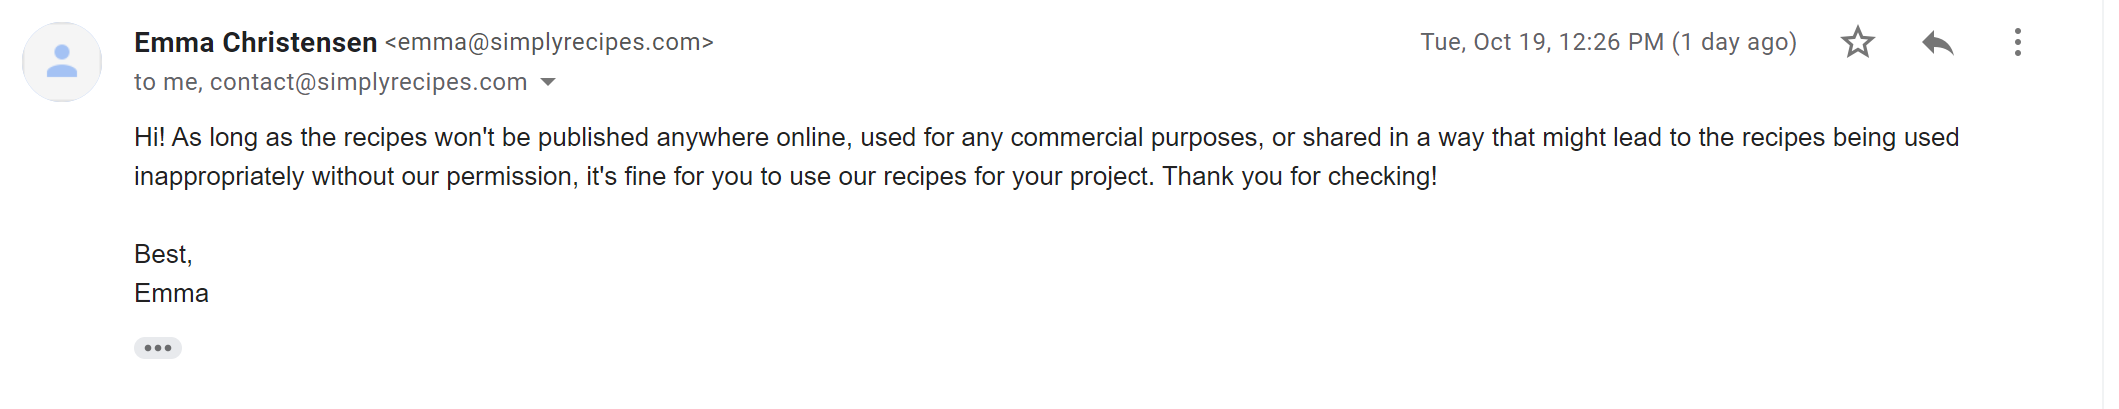


Using robots.txt, I get the following page: 
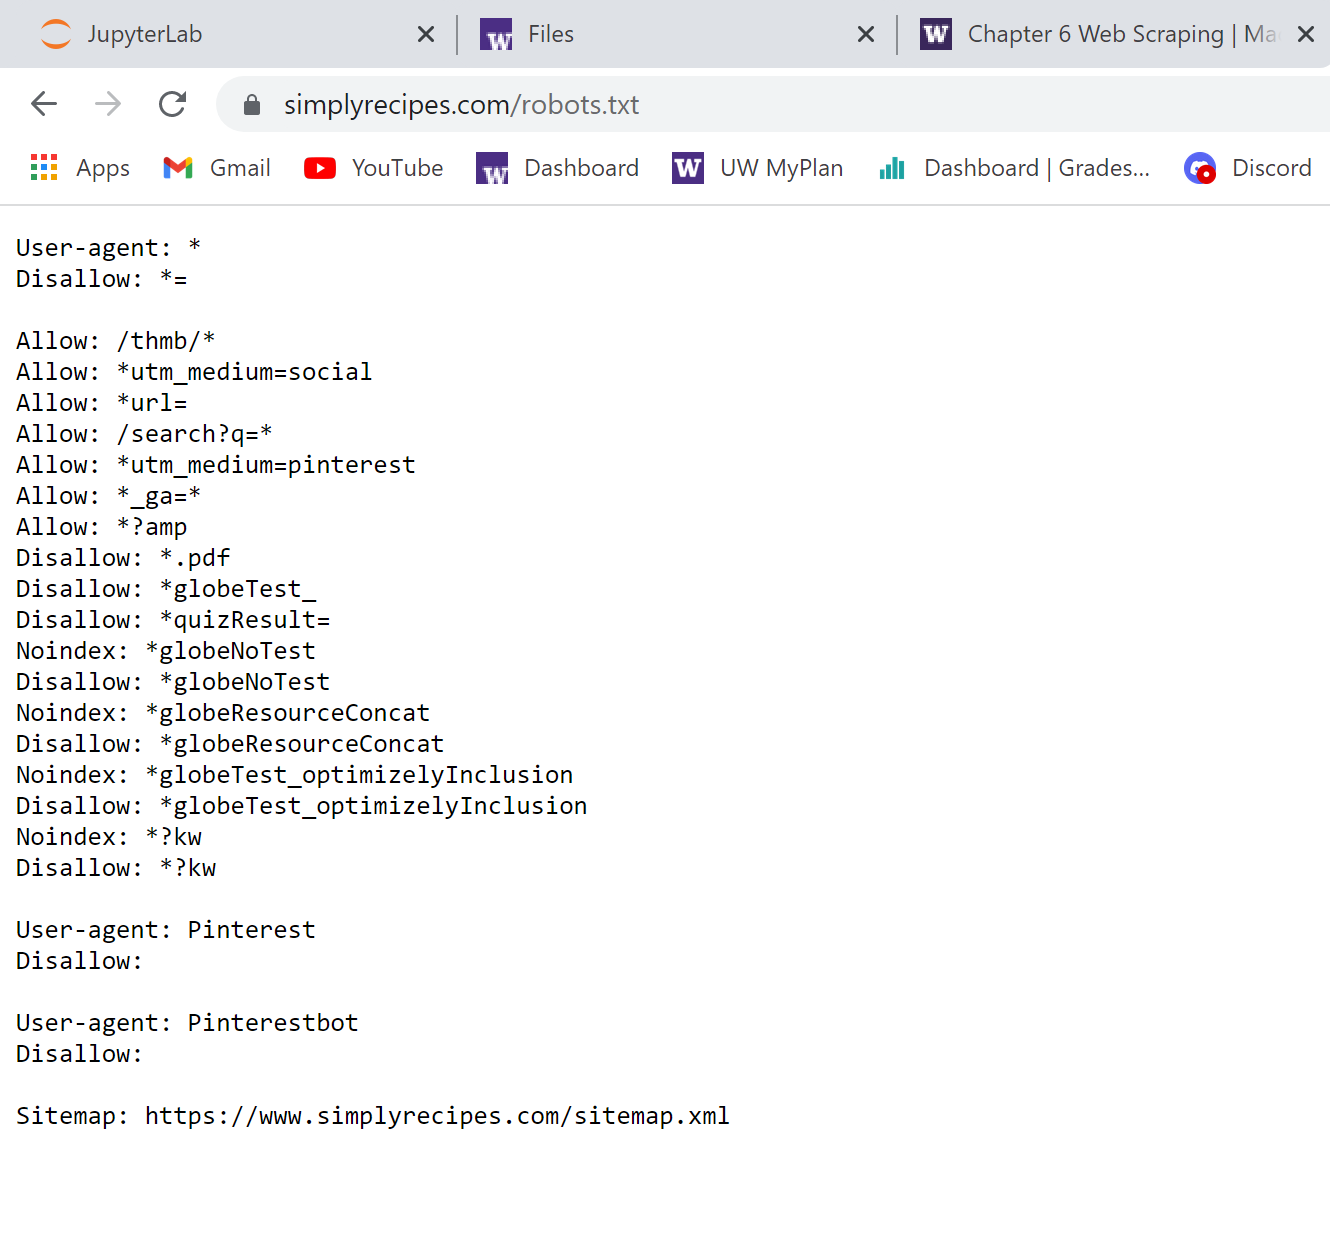
Combined, I am assured with the allowance of scraping recipes from the website. 

To lessen the burden to the provider, I first checked the format of the recipe content with a sample recipe to find the pattern of how ingredients are listed. I also checked all 50 recipes manually and checked that they are working so that I don't have to scrape more recipes than needed.  After doing so, I only scraped the minimum amount of recipes needed (50). 

### 2. Scrape the Recipies

In [1]:
# import all necessary libraries
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd

In [2]:
# practice run to show how the header and the "ingredients" section of the recipe are formatted: 
response = requests.get('https://www.simplyrecipes.com/recipes/garlic_bread')
soup = BeautifulSoup(response.content, 'html.parser')
ingredients = soup.find("li", {"class": "structured-ingredients__list-item"}) # The ingredient portion is listed with the class of "structured-ingredients__list-item"
print("name of the food:", soup.h1) # The first element with the header tag contains the name of the menu
print()
print("format of the ingredients part:", ingredients)  # In general, each ingredient listed is formatted as: 
                                                       # <span1> quantity </span1> <span2> unit </span2> <span3> ingredient </span3>
                                                       # by finding_all("span") for an ingredient will parse the "quantity", "unit", "ingredient" portion of the text


name of the food: <h1 class="heading__title">Garlic Bread</h1>

format of the ingredients part: <li class="structured-ingredients__list-item">
<p>1 16-ounce (<span data-ingredient-quantity="true">450 </span><span data-ingredient-unit="true">g)</span> loaf <span data-ingredient-name="true">Italian bread or French bread</span></p>
</li>


In [4]:
# menu is the list of all the recipe menus
menu = ['lasagna', 'classic_baked_chicken', 'french_onion_soup', 'osso_buco', 'pot_roast', 'brownie_in_a_mug', 'beef_stroganoff', 'garlic_bread', 'spaghetti_alla_carbonara', 'swedish_meatballs', 'chicken_tikka_masala', 'broccoli_cheddar_soup', 'quesadilla', 'ham_salad', 'salmon_avocado_poke_bowl', 'broccoli_cheddar_bites', 'buttermilk_biscuits_and_sausage_gravy', 'omelette_in_a_mug', 'microwave_poached_eggs', 'lamb_korma', 'singapore_noodles_with_shrimp', 'mango_chicken_curry', 'pan_simmered_pacific_black_cod', 'memphis_style_pork_ribs', 'spanish_tortilla', 'ceviche', 'french_toast', 'shrimp_fried_rice', 'moms_ground_turkey_and_peppers', 'fettuccine_alfredo', 'pan_simmered_pacific_black_cod', 'honey_mustard_baked_salmon', 'pork_chops_with_dijon_sauce', 'pesto_pasta_salad', 'garlic_mashed_potatoes', 'scrambled_eggs_with_kale_and_mozzarella', 'apple_crisp', 'pecan_pie', 'roast_turkey_breast_with_roasted_garlic_gravy', 'cioppino', 'crab_bisque', 'stir_fry_ginger_beef', 'bouillabaisse', 'tandoori_chicken', 'colcannon', 'spinach_risotto', 'huevos_rancheros', 'carne_asada', 'brussels_sprouts_gratin', 'corned_beef_hash', 'irish_beef_stew']
menu = sorted(menu) # sorting menu alphabetically for cleanliness
recipes = [];        # dataframe that will collect all the recipe information
idnum = 0; # id number of each recipe menu
# problem 1. the outer for loop is the code to scrape recipes from the website
for food in menu : 
    response = requests.get('https://www.simplyrecipes.com/recipes/' + food) # concatenating the base url with the food name to get to the correct webpage
    soup = BeautifulSoup(response.content, 'html.parser')
    ingredients = soup.find_all("li", {"class": "structured-ingredients__list-item"}) # finds all ingredients for the current menu
    name = soup.h1.get_text() # gets the menu name
    # problem 2. pull out ingredients from the website and parse into different parts
    for item in ingredients : 
        ingredient_parse = item.find_all("span") # parses the quantity, unit, ingredient portion of each ingredient item 
        if len(ingredient_parse) == 3 :          # checks if all three measures are parsed 
            quantity = ingredient_parse[0].get_text()  # by the convention, the first element contains quantity value
            unit = ingredient_parse[1].get_text()      # the second element contains unit value
            ingre = ingredient_parse[2].get_text()     # the last element contations the ingredient name
        else :                                   # in case the ingredient item is not formatted by the usual convention, just take only the ingredient name which will be the last element
            quantity = ''
            unit = ''
            ingre = ingredient_parse[-1].get_text()
        
        # Problem 3. add all the data to the corresponding columns in recipe dataframe
        recipes.append({'id': idnum, 
                       'name': name, 
                       'text': item.get_text(), 
                       'quantity': quantity,
                       'unit': unit, 
                       'ingredient': ingre})
    idnum += 1
recipes = pd.DataFrame(recipes)
recipes.text = recipes.text.str.replace(r'\n', '', regex=True) # to remove the "\n" tag in each text 
recipes.sample(n=20)


,id,name,text,quantity,unit,ingredient
555,48,Ginger Beef Stir Fry,"3 to 4 green onions, cut on a diagonal, 1/2-in...",,,onions
156,11,Cioppino,1 teaspoon salt,1,teaspoon,salt
575,49,Swedish Meatballs,Salt and pepper to taste,,,Salt and pepper to taste
522,45,Pasta Carbonara,3-4 whole eggs,,,whole eggs
272,24,Irish Beef Stew,1 1/4 pounds well-marbled chuck beef stew meat...,1 1/4,pounds,chuck beef
455,40,Roast Turkey Breast with Roasted Garlic Gravy,2 fresh (unsmoked) turkey wings,2,fresh (unsmoked),turkey wings
96,8,Carne Asada,1/4 cup soy sauce,1/4,cup,soy sauce
116,9,Ceviche,1/2 cup freshly squeezed lemon juice,1/2,cup,lemon juice
514,44,Singapore Noodles with Shrimp,"4 scallions, green and white parts cut into 1-...",4,scallions,scallions
331,27,Mango Chicken Curry,2 tablespoons fresh minced ginger,2,tablespoons,ginger


Showing the random 20 rows of the recipes dataframe. We can see that the texts are parsed into quantity, unit, and ingredient for different recipes. 

In [5]:
# Store dataframe as a csv file 
recipes.to_csv('recipes_data.csv.bz2', index = False)
check = pd.read_csv('recipes_data.csv.bz2')
check.sample(n=5)

,id,name,text,quantity,unit,ingredient
563,49,Swedish Meatballs,"3 slices bread, crusts removed, cut into cubes...",3,slices,bread
319,26,Lasagna,1 pinch garlic powder and/or garlic salt,1,pinch,garlic powder and/or garlic salt
218,17,French Onion Soup,1 tablespoon fresh thyme leaves (can also use ...,1,tablespoon,fresh thyme leaves (can also use a few sprigs...
349,28,Memphis-Style Pork Ribs,1 teaspoon dry mustard,1,teaspoon,dry mustard
556,48,Ginger Beef Stir Fry,"2 cloves garlic, thinly sliced",NaN,NaN,"garlic,"


We can see that the recipes data frame has succesfuly saved to csv file and there is no problem reading the file. 

### 3. What is more common. Sweet or Salty food?

In [17]:
recipes_new = recipes # copy of a recipe dataframe since new columns will be added
# Below create new columns containg boolean values of whether each ingredient is salt/sugar or not. 
# To exclude ingredients like "unsalted butter", I put '\b' expression to only account for 
# words starting with salt/sugar.
recipes_new['contains_salt'] = recipes_new.ingredient.str.contains(r'\bsalt') 
recipes_new['contains_sugar'] = recipes_new.ingredient.str.contains(r'\bsugar') 
recipes_new.sample(n=10) # the random 10 rows showing whether each row contains the word "salt" or "sugar"

,id,name,text,quantity,unit,ingredient,contains_salt,contains_sugar
311,26,Lasagna,"1/2 large bell pepper (green, red, or yellow),...",1/2,large,"bell pepper (green, red, or yellow), diced (ab...",False,False
288,24,Irish Beef Stew,"3 to 4 carrots or parsnips, cut into 1/2-inch ...",,,carrots,False,False
167,12,Classic Baked Chicken,Kosher salt,,,Kosher salt,True,False
102,8,Carne Asada,"4 garlic cloves, minced",,,",",False,False
109,8,Carne Asada,Lime wedges,,,Lime wedges,False,False
483,42,Scrambled Eggs with Kale and Mozzarella,Pinch red pepper flakes,,,red pepper flakes,False,False
176,14,Corned Beef Hash,2 to 3 tablespoons unsalted butter,2 to 3,tablespoons,unsalted butter,False,False
9,1,Beef Stroganoff,Freshly ground black pepper to taste,,,Freshly ground black pepper to taste,False,False
164,11,Cioppino,1/2 cup minced parsley for garnish,1/2,cup,parsley,False,False
583,50,Tandoori Chicken,1 tablespoon sweet (not hot) paprika,1,tablespoon,paprika,False,False


In [54]:
# groupby name of the recipes and use any(), value_counts() to count all the recipes that were true of containing salt or sugar
print("The number of recipes containing salt:")
print(recipes_new[['name', 'contains_salt']].groupby('name').any().value_counts())
print()
print("The number of recipes containing sugar:")
print(recipes_new[['name', 'contains_sugar']].groupby('name').any().value_counts())

The number of recipes containing salt:
contains_salt
True             28
False            22
dtype: int64

The number of recipes containing sugar:
contains_sugar
False             40
True              10
dtype: int64


There are 28 recipes containing salt and there are 10 recipes containing sugar. Hence there are more recipes containing salt than that of containing sugar. 

In [72]:
recipes_new[recipes_new.contains_salt == True].head(10)

,id,name,text,quantity,unit,ingredient,contains_salt,contains_sugar
8,1,Beef Stroganoff,Kosher salt to taste,,,Kosher salt to taste,True,False
19,2,Bouillabaisse,1/2 teaspoon salt,1/2,teaspoon,salt,True,False
34,2,Bouillabaisse,2 teaspoons salt,2,teaspoons,salt,True,False
46,3,Broccoli Cheddar Bites,1/2 teaspoon kosher salt,1/2,teaspoon,kosher salt,True,False
56,4,Broccoli Cheddar Soup,1 teaspoon salt,1,teaspoon,salt,True,False
63,5,Brownie in a Mug,Pinch kosher salt,,,salt,True,False
80,7,Biscuits and Gravy,1/2 teaspoon kosher salt,1/2,teaspoon,kosher salt,True,False
91,7,Biscuits and Gravy,1/4 teaspoon salt,1/4,teaspoon,salt,True,False
107,8,Carne Asada,Kosher salt and freshly ground black pepper,,,Kosher salt and freshly ground black pepper,True,False
120,9,Ceviche,2 teaspoons kosher salt,2,teaspoons,kosher salt,True,False


I encountered several issues with calculating the absolute quantity of salt and sugar. Above shows all the rows in the recipes dataframe containing "salt" and we can see that some recipes did not include any information about salt quantity and unit (i.e. the first row). Also the quantity "pinch" is very abstract. Another problem is that the quantity values are in string. Below shows what happens when I tried to add the quantities by different unit and since the quantities are in string, the values are not adding up as number. We can use 'eval' function to convert the string value to numerical value, but the unclarity of the units still limits the accuracy of the absolute quantity.

In [70]:
recipes_new[recipes_new.contains_salt == True].groupby('unit').quantity.sum()

unit
                                                  
pinch                                            1
teaspoon     1/21/211/21/41/211/21/21/21/21/21/211
teaspoons                               221 1/4232
Name: quantity, dtype: object

In [71]:
recipes_new[recipes_new.contains_sugar == True].groupby('unit').quantity.sum()

unit
cup            11 tablespoon to 1/41/21/2
tablespoon                           11/2
tablespoons                            32
teaspoon                                1
teaspoons                               2
Name: quantity, dtype: object